In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [156]:
# Define the file path for the cleaned housing data
file_path = '../data/cleaned_housing.csv'

# Load the cleaned housing data
df = pd.read_csv(file_path)


In [157]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420.0,4,2,3,1,1,2,1,2
1,16.321037,8960.0,4,3,3,1,1,2,0,2
2,16.321037,9960.0,3,2,2,1,0,2,1,1
3,16.318175,7500.0,4,2,2,1,1,2,1,2
4,16.250001,7420.0,4,1,2,1,1,2,0,2


In [158]:
print(df.head())


       price    area  bedrooms  bathrooms  stories  mainroad  airconditioning  \
0  16.403275  7420.0         4          2        3         1                1   
1  16.321037  8960.0         4          3        3         1                1   
2  16.321037  9960.0         3          2        2         1                0   
3  16.318175  7500.0         4          2        2         1                1   
4  16.250001  7420.0         4          1        2         1                1   

   parking  prefarea  furnishingstatus  
0        2         1                 2  
1        2         0                 2  
2        2         1                 1  
3        2         1                 2  
4        2         0                 2  


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   airconditioning   545 non-null    int64  
 7   parking           545 non-null    int64  
 8   prefarea          545 non-null    int64  
 9   furnishingstatus  545 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 42.7 KB


In [160]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,15.306987,5102.249541,2.939450,1.284404,1.730275,0.858716,0.315596,0.671560,0.234862,0.930275
std,0.372165,2005.804353,0.676553,0.494301,0.701037,0.348635,0.465180,0.813726,0.424302,0.761373
min,14.375127,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.048071,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,15.283385,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,15.562970,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,16.403275,10500.000000,4.000000,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000


In [161]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420.0,4,2,3,1,1,2,1,2
1,16.321037,8960.0,4,3,3,1,1,2,0,2
2,16.321037,9960.0,3,2,2,1,0,2,1,1
3,16.318175,7500.0,4,2,2,1,1,2,1,2
4,16.250001,7420.0,4,1,2,1,1,2,0,2


In [162]:
# Define features and target
X = df.drop(['price'], axis=1)  # Keep all features except price
y = df['price']  # Use log-transformed target

In [163]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [164]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
# make a scaler pickle file
with open('../notebook/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [166]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [167]:
# Predict on test set
y_pred_log = model.predict(X_test_scaled)

In [168]:
# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

In [169]:
#lets see the performance of the model on the test set
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 1043530.2098355673
Root Mean Squared Error: 1385893.5233587713
R^2 Score: 0.6200070897281396


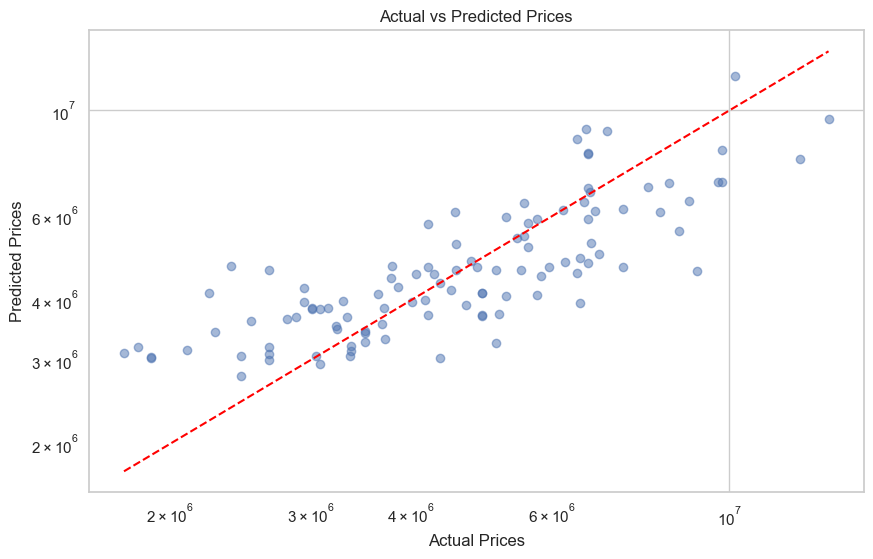

In [170]:
# Set the style for the seaborn plots
import seaborn as sns
sns.set(style='whitegrid')
# Create a scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

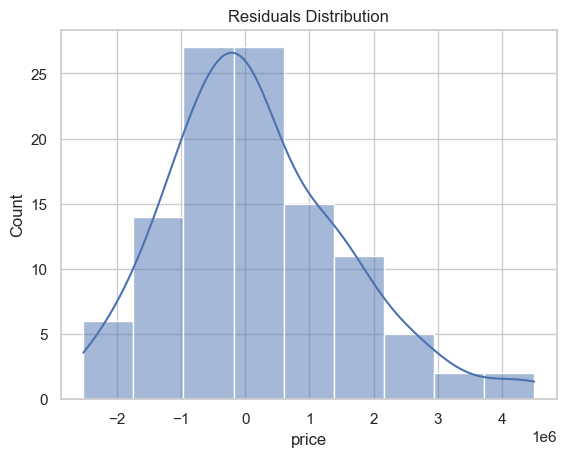

In [171]:
# Create a histogram of residuals
# residuals measure the difference between actual and predicted values
sns.histplot(y_test_original - y_pred, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [172]:
# Lets Predict the prices for new data
# Create a new DataFrame with the same features as the training data

new_house = pd.DataFrame({
   'area': [9960.0],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'airconditioning': [0],
    'parking': [1],
    'prefarea': [1],
    'furnishingstatus': [2]
})







# Scale the new data using the same scaler
new_house_scaled = scaler.transform(new_house)
# Predict the price for the new house
predicted_price = model.predict(new_house_scaled)

# # Display the predicted price
print(f"\nPredicted price for the new house in log1p scale: {predicted_price[0]}")

# # let's convert the predicted price back to the original scale
predicted_price_original = np.expm1(predicted_price[0])
print(f"Predicted price for the new house in original scale: {predicted_price_original:.2f}")






Predicted price for the new house in log1p scale: 15.908970980722389
Predicted price for the new house in original scale: 8112939.85


In [173]:
# Save the trained model to a pickle file
with open('../notebook/linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
